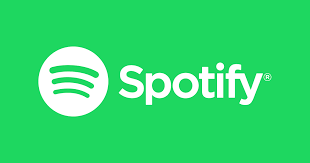

# **Introduction :**
---
> Spotify is an audio streaming platform that provides DRM-restricted music, videos, and podcasts from record labels and media companies. It has more than 50 million tracks which user can browse using various parameters like artists, album, genre, or via playlists.



---

> Here we have taken the data of top 50 songs of 2019 from spotify database and we have performed various data analytics and visualisation operations on the dataset. Hereby using these mathematical models we can analyise the genre, beats per minute, loudness, valence, length, acousticeness, speechiness and hence finding out the popularity and the common thread between them.

---

> 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # used for working with arrays & linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats # used for scientific computing and technical computing.
!pip install squarify
import squarify as sq # Bar charts can't be effective to handle and visualize large data 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns # provides a high-level interface for drawing attractive and informative statistical graphics
import sklearn #including classification, regression, clustering and dimensionality reduction
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Question 1: Print the first 5 rows that are present in the data?**

In [ ]:
filename='top50.csv'
df=pd.read_csv(filename,encoding='ISO-8859-1')
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94




```
# This is formatted as code
```

### **Question 2: How many rows and columns are present in the data?**

In [ ]:
#Calculates the number of rows and columns
print(df.shape)

(50, 14)


### **Question 3: Rename the columns as given below?**
Track.Name:'track_name'

*  Artist.Name:'artist_name'
*  Track.Name:'track_name'
* Genre: 'genre'
*   Energy: 'energy'
*   Liveness: 'liveness'
*   List item
*   Popularity: 'popularity"
* Loudness..dB..:'Loudness(dB)'
* Valence.:'Valence' 
* Speechiness-:Speechiness
* Acousticness..:'Acousticness'
* Beats.Per.Minute:'beats_per_minute'
* Length.:'Length'

In [ ]:
#Renaming the columns
df.rename(columns={'Track.Name':'track_name','Artist.Name':'artist_name','Beats.Per.Minute':'beats_per_minute','Loudness..dB..':'Loudness(dB)','Valence.':'Valence','Length.':'Length', 'Acousticness..':'Acousticness','Speechiness.':'Speechiness'},inplace=True)
df.head()

,Unnamed: 0,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94



### **Question 4: Replace all the null values and missing values by '0'?**

In [ ]:
#counts the null values and replace it by 0
df.isnull().sum() #show the missing values in the data set 
df.fillna(0) 

,Unnamed: 0,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



### **Question 5: What are the datatypes of the different columns in the dataset?**



In [ ]:
# The datatypes of the different attributes of the dataset
print(df.dtypes)

Unnamed: 0           int64
track_name          object
artist_name         object
Genre               object
beats_per_minute     int64
Energy               int64
Danceability         int64
Loudness(dB)         int64
Liveness             int64
Valence              int64
Length               int64
Acousticness         int64
Speechiness          int64
Popularity           int64
dtype: object





### **Question 6 : How many genre are there? List the number of songs in each genre.**

---



In [ ]:
#Calculating the number of songs of each genre
print(type(df['Genre']))
popular_genre=df.groupby('Genre').size().unique
print(popular_genre)
genre_list=df['Genre'].values.tolist()

<class 'pandas.core.series.Series'>
<bound method Series.unique of Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64>



### **Question 7 : How many artist are there? list the number of songs each artist has created.**

In [ ]:
#Calculating the number of songs by each of the artists
print(df.groupby('artist_name').size())
popular_artist=df.groupby('artist_name').size()
print(popular_artist)
artist_list=df['artist_name'].values.tolist()

artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64
artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown      


### **Question 8 : Set the precision for the data values in the table 3.**

In [ ]:
pd.set_option('precision', 3)
df.describe()

,Unnamed: 0,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000,50.000,50.000,50.00,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,25.500,120.060,64.060,71.38,-5.660,14.660,54.600,200.960,22.160,12.480,87.500
std,14.577,30.898,14.232,11.93,2.056,11.118,22.336,39.144,18.996,11.162,4.491
min,1.000,85.000,32.000,29.00,-11.000,5.000,10.000,115.000,1.000,3.000,70.000
25%,13.250,96.000,55.250,67.00,-6.750,8.000,38.250,176.750,8.250,5.000,86.000
50%,25.500,104.500,66.500,73.50,-6.000,11.000,55.500,198.000,15.000,7.000,88.000
75%,37.750,137.500,74.750,79.75,-4.000,15.750,69.500,217.500,33.750,15.000,90.750
max,50.000,190.000,88.000,90.00,-2.000,58.000,95.000,309.000,75.000,46.000,95.000




###  **Question 9 : Plot a histogram for the dataset keeping liveness as the base measure with normalization bin size - 10.**


Unnamed: 0          0.000000
Beats.Per.Minute    0.854504
Energy             -0.453199
Danceability       -1.379891
Loudness..dB..     -0.831915
Liveness            2.203937
Valence.           -0.046490
Length.             0.748554
Acousticness..      1.135290
Speechiness.        1.377581
Popularity         -1.503434
dtype: float64


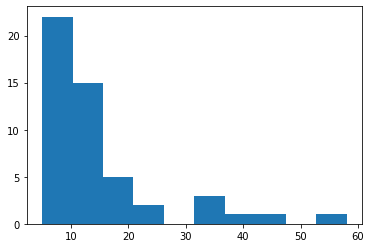

In [ ]:
#Finding out the skew for each attribute
skew=df.skew()
print(skew)
# Removing the skew by using the boxcox transformations
#transform=np.asarray(df[['Liveness']].values)
#df_transform = stats.boxcox(transform)[0]
# Plotting a histogram to show the difference 
plt.hist(df['Liveness'],bins=10) #original data
plt.show()




### **Question 10 : Calculate the correlation among the attributes. Set the precision at 3 use the spearman method to plot.**



In [ ]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlation=df.corr(method='spearman')
print(correlation)

                  Unnamed: 0  beats_per_minute  Energy  Danceability  Loudness(dB)  Liveness  \
Unnamed: 0             1.000            -0.263   0.132         0.053        -0.014     0.102   
beats_per_minute      -0.263             1.000   0.012        -0.092         0.014    -0.033   
Energy                 0.132             0.012   1.000        -0.049         0.635     0.013   
Danceability           0.053            -0.092  -0.049         1.000         0.009    -0.261   
Loudness(dB)          -0.014             0.014   0.635         0.009         1.000     0.114   
Liveness               0.102            -0.033   0.013        -0.261         0.114     1.000   
Valence                0.113            -0.048   0.467         0.155         0.317    -0.187   
Length                 0.045            -0.198   0.189        -0.079         0.165     0.202   
Acousticness           0.058            -0.010  -0.211        -0.128        -0.040     0.204   
Speechiness           -0.232            



### **Question 11 : Plot a bar graph with count of tracks on the Y axis and Genre on the X axis**



Text(0.5, 1.0, 'Genre vs Count of the tracks')

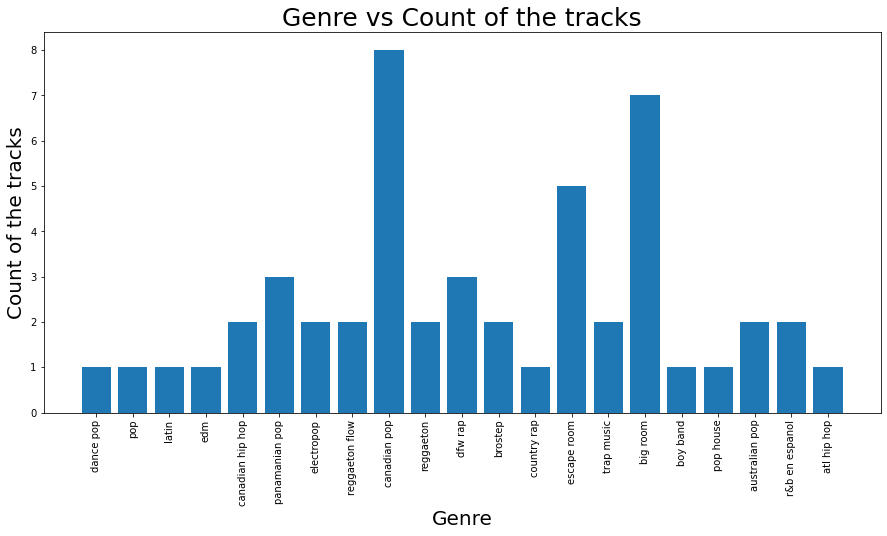

In [ ]:

xtick = ['dance pop', 'pop', 'latin', 'edm', 'canadian hip hop',
'panamanian pop', 'electropop', 'reggaeton flow', 'canadian pop',
'reggaeton', 'dfw rap', 'brostep', 'country rap', 'escape room',
'trap music', 'big room', 'boy band', 'pop house', 'australian pop',
'r&b en espanol', 'atl hip hop']
length = np.arange(len(xtick))
genre_groupby = df.groupby('Genre')['track_name'].agg(len)
plt.figure(figsize = (15,7))
plt.bar(length, genre_groupby)
plt.xticks(length,xtick)
plt.xticks(rotation = 90)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Count of the tracks', fontsize = 20)
plt.title('Genre vs Count of the tracks', fontsize = 25)


### **Question 12 : Plot a heatmap showing correlation between different attributes?**









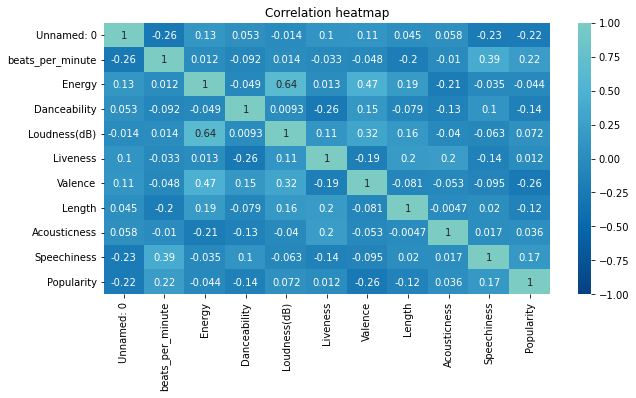

In [ ]:
# heatmap of the correlation 
plt.figure(figsize=(10,5))
plt.title('Correlation heatmap')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="GnBu_r",center=1)



### **Question 13 : Plot a bar graph with count of songs on the Y axis and Artist Name on the X axis**



Text(0.5, 1.0, 'Artist Name vs Count of songs')

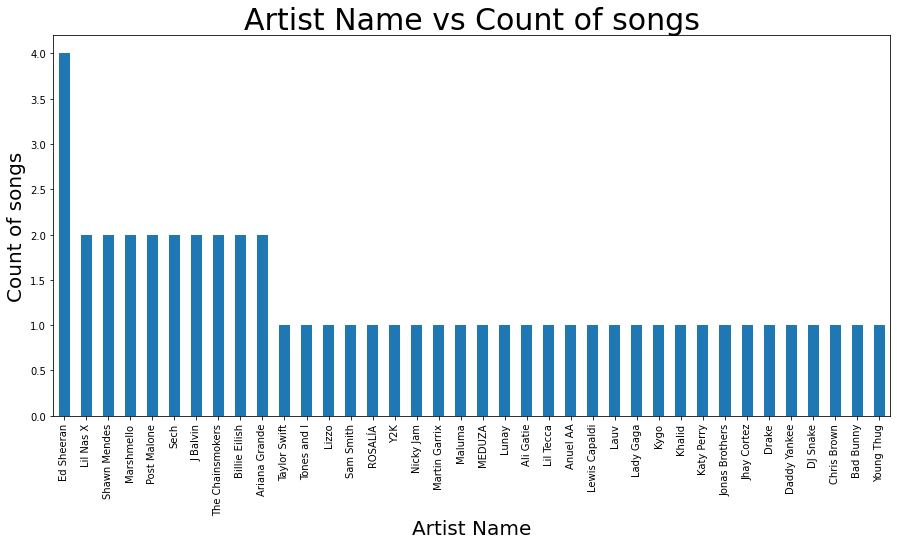

In [ ]:
fig = plt.figure(figsize = (15,7))
df.groupby('artist_name')['track_name'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Artist Name', fontsize = 20)
plt.ylabel('Count of songs', fontsize = 20)
plt.title('Artist Name vs Count of songs', fontsize = 30)

### **Question 14 : Plot data and a linear regression model corresponding to loudness and energy attributes.** 

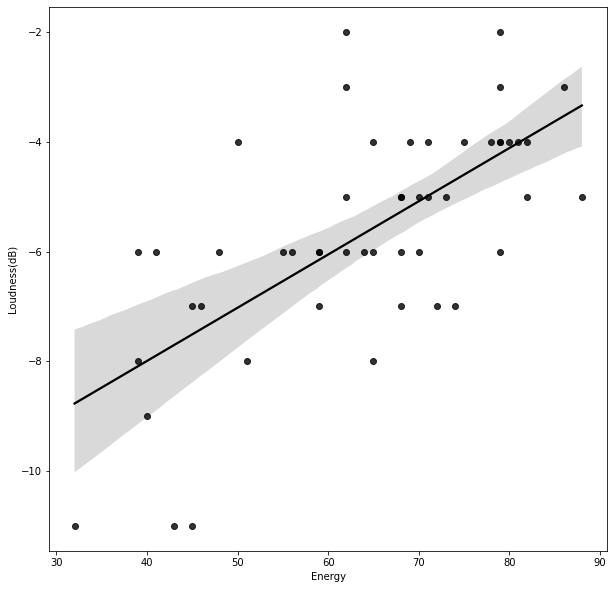

In [ ]:
# Analysing the relationship between energy and loudness
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Energy',y='Loudness(dB)',data=df,color='black')

### **Question 15 : Plot regression model on energy and popularity also plot its kernel density estimate** 

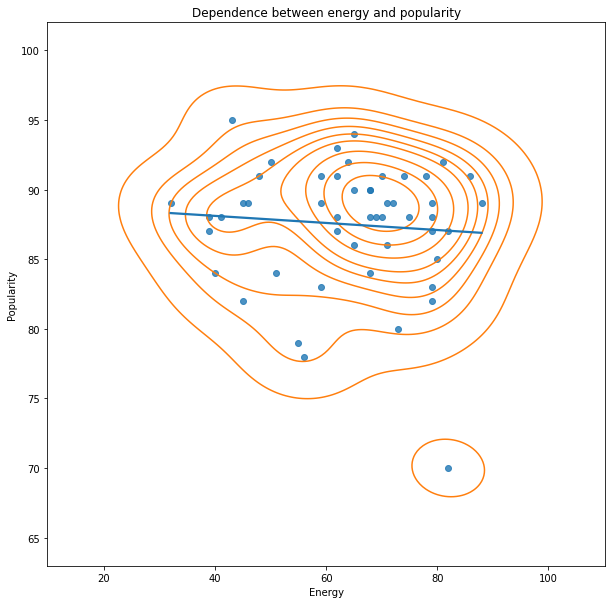

In [ ]:
fig=plt.subplots(figsize=(10,10))
plt.title('Dependence between energy and popularity')
sns.regplot(x='Energy', y='Popularity',ci=None, data=df) #regression plot
sns.kdeplot(df.Energy,df.Popularity) #kernel density estimation

### **Question 16 : Plot a scatter matrix to show the interdependency between the attributes of the dataset.**

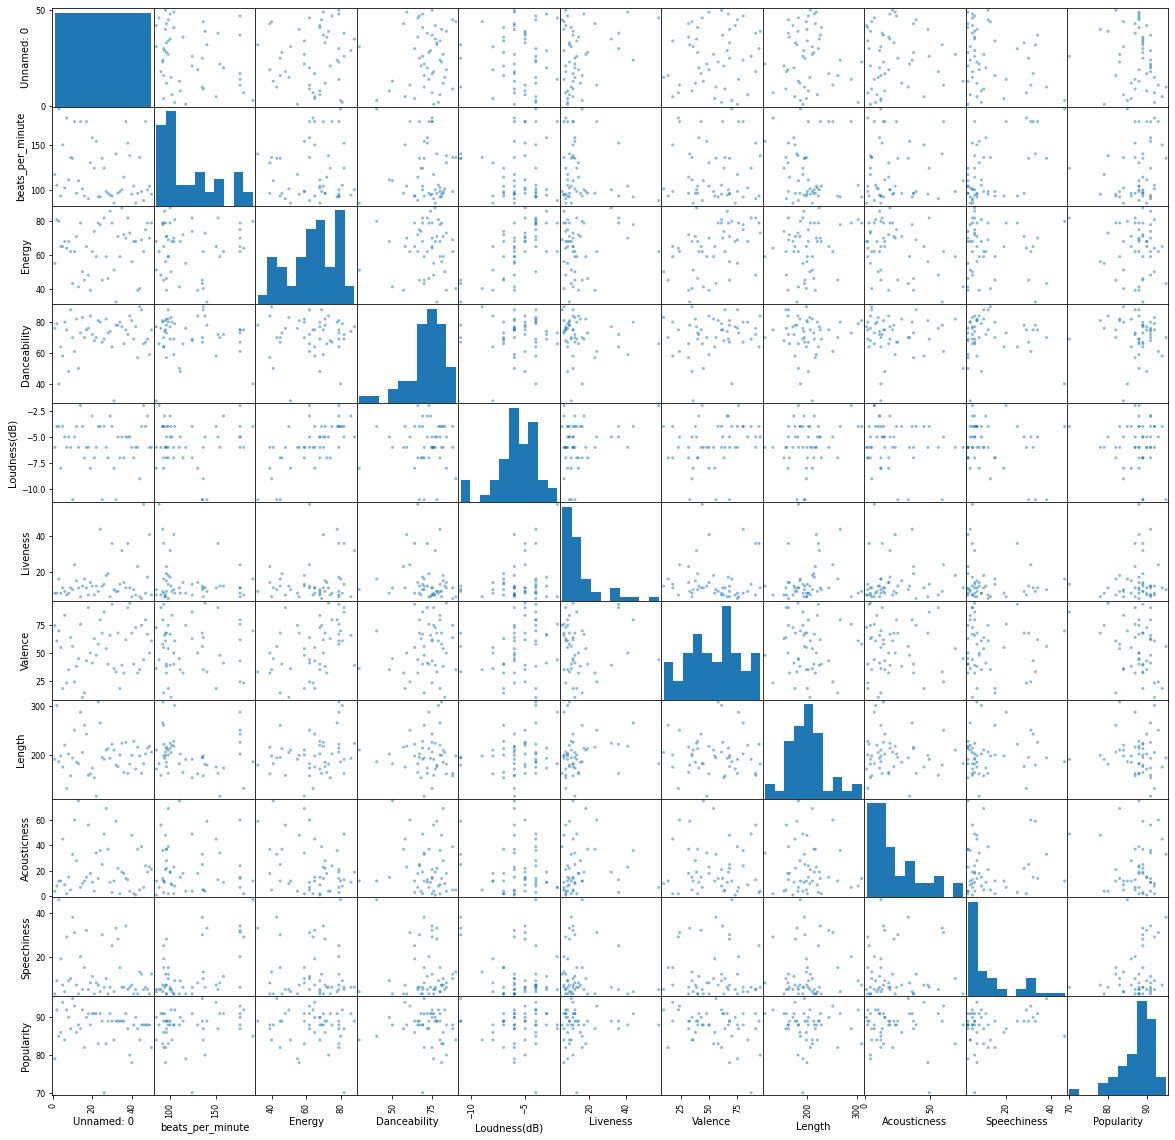

In [ ]:
scatter_matrix(df)
plt.gcf().set_size_inches(20, 20)
plt.show()

### **Question 17 : Plot a box plot of each attributes scaling from 0 to 50 .**

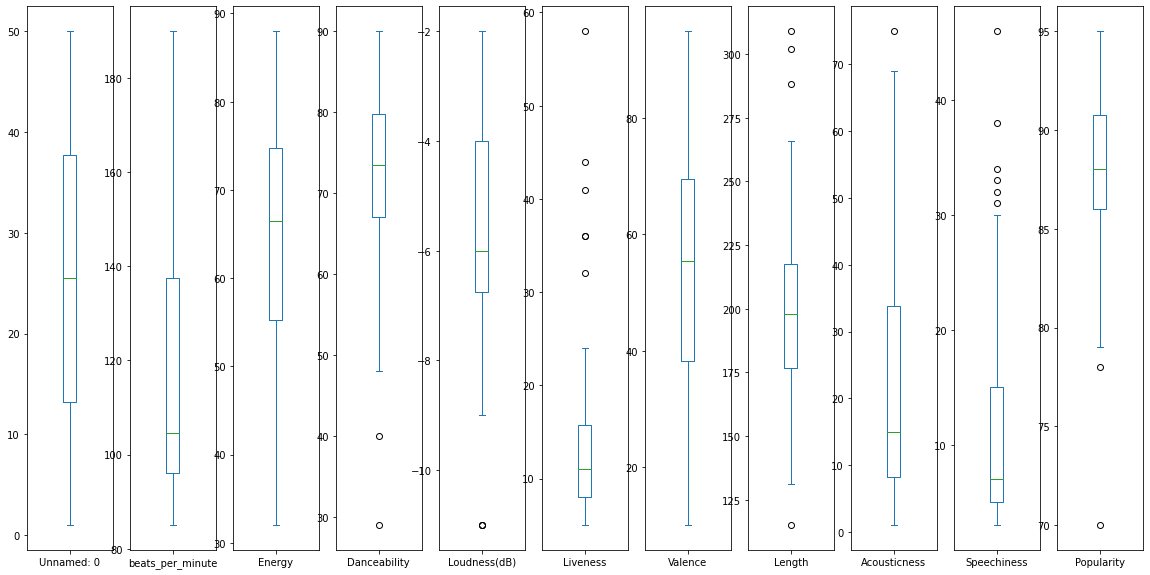

In [ ]:
df.plot(kind='box', subplots=True)
plt.gcf().set_size_inches(20,10)
plt.show()



### **Question 18 : Plot a square chart on the basis of number of song .**
 



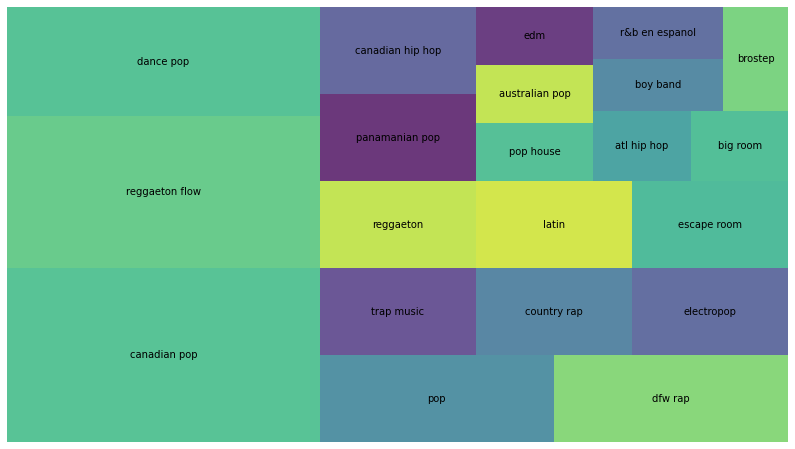

In [ ]:
plt.figure(figsize=(14,8))
sq.plot(sizes=df.Genre.value_counts(), label=df["Genre"].unique(), alpha=.8 )
plt.axis('off')
plt.show()

### **Question 19 : Plot a pie chart on the number of songs created by each artist.**

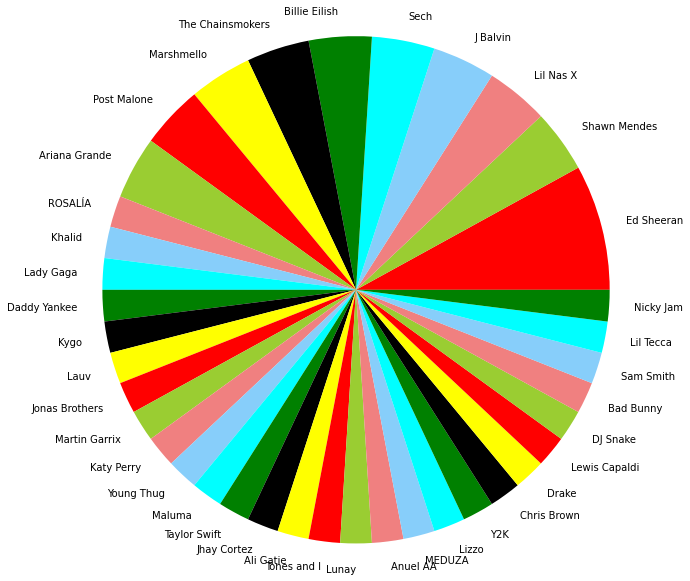

In [ ]:
#Pie charts 
labels = df.artist_name.value_counts().index
sizes = df.artist_name.value_counts().values
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','cyan', 'green', 'black','yellow']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors)
autopct=('%1.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
#Linear regression, first create test and train dataset
x=df.loc[:,['Energy','Danceability','Length','Loudness(dB)','Acousticness']].values
y=df.loc[:,'Popularity'].values

In [ ]:
# Creating a test and training dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [ ]:
# Linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

92.64763022338748
[-0.01605118 -0.04818298  0.00354461  0.00463808  0.00351609]


In [ ]:
#Displaying the difference between the actual and the predicted
y_pred = regressor.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       91     86.199
1       88     86.133
2       86     87.541
3       87     87.730
4       90     86.681
5       84     90.481
6       92     89.236
7       91     85.948
8       89     86.691
9       91     86.060
10      91     87.499
11      90     87.918
12      84     88.050
13      79     89.001
14      88     88.264


In [ ]:
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.580070796867278
Mean Squared Error: 18.562267625004147
Root Mean Squared Error: 4.308395017289402


Text(0, 0.5, 'Test values')

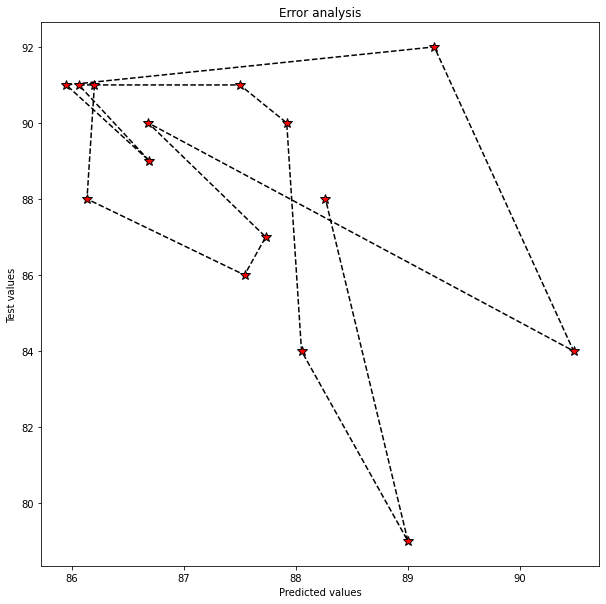

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(y_pred,y_test,color='black',linestyle='dashed',marker='*',markerfacecolor='red',markersize=10)
plt.title('Error analysis')
plt.xlabel('Predicted values')
plt.ylabel('Test values')

In [ ]:
# Cross validation score
x=df.loc[:,['Energy','Danceability']].values
y=df.loc[:,'Popularity'].values
regressor=LinearRegression()
mse=cross_val_score(regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse_mean=np.mean(mse)
print(mse_mean)
diff=metrics.mean_squared_error(y_test, y_pred)-abs(mse_mean)
print(diff)

-30.780336724856106
-12.21806909985196


In [ ]:
x=df.loc[:,['artist_name']].values
y=df.loc[:,'Genre'].values

In [ ]:
# Label encoding of features
x.shape
encoder=LabelEncoder()
x = encoder.fit_transform(x)
x=pd.DataFrame(x)
x

ValueError: ignored

In [ ]:
# Label Encoding of target
Encoder_y=LabelEncoder()
Y = Encoder_y.fit_transform(y)
Y=pd.DataFrame(Y)
Y

,0
0,2
1,14
2,7
3,8
4,16
5,6
6,14
7,12
8,9
9,17


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

#Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
# KNN Classification
# sorted(sklearn.neighbors.VALID_METRICS['brute'])
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
error=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

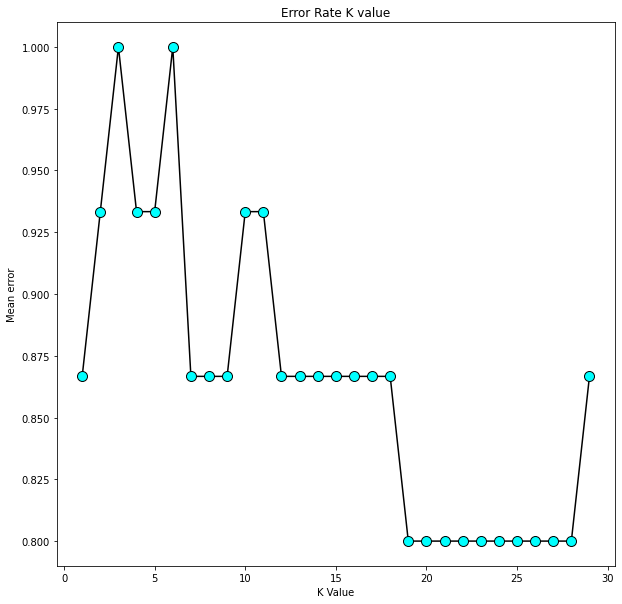

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(1,30),error,color='black',marker='o',markerfacecolor='cyan',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [ ]:
x=df.loc[:,['Energy','Length','Danceability','beats_per_minute', 'Acousticness']].values
y=df.loc[:,'Popularity'].values

KeyError: ignored

In [ ]:
# Creating a test and training dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       87         88
1       88         88
2       89         89
3       70         91
4       90         91
5       89         88
6       91         91
7       82         91
8       88         91
9       91         89
10      83         92
11      86         90
12      87         91
13      89         92
14      89         91


In [ ]:
# Testing the accuracy of Naive Bayes 
scores=cross_val_score(gnb,X_train,y_train,scoring='accuracy',cv=3).mean()*100
print(scores)

11.616161616161618


In [ ]:
sns.jointplot(x=y_test, y=y_pred, kind="kde", color="r")

In [ ]:
x=df.loc[:,['Energy','Length','Danceability','beats_per_minute', 'Acousticness']].values
y=df.loc[:,'Popularity'].values

KeyError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [ ]:
# Linear SVM model 
LinSVC = LinearSVC(penalty='l2', loss='squared_hinge', dual=True)
LinSVC.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

NameError: ignored

In [ ]:
# Testing the accuracy
scores=cross_val_score(LinSVC,X_train,y_train,scoring='accuracy',cv=3).mean()*100
print(scores)

NameError: ignored

In [ ]:
sns.jointplot(x=y_test, y=y_pred, kind="reg", color="b");